```{warning}
Experimental features!
```

```{warning}
Notebook under construction!
```

# Starry light curve

*jaxoplanet* aims to match the features of starry, a framework to compute the light curves of systems made of of non-uniform spherical bodies. In this small tutorial we demonstrate some of these features.


We start by defining two bodies and their associated surface maps

In [26]:
import numpy as np

from jaxoplanet.experimental.starry import Map, Ylm, show_map
from jaxoplanet.orbits import keplerian

y = Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 1e-1]))
central_map = Map(y=y, inc=0.9, obl=-0.3, period=1.2, u=[0.5, 0.5])
central = keplerian.Central(radius=1.0, mass=0.8, map=central_map)

y = Ylm.from_dense(np.hstack([1.0, np.random.rand(10) * 0.3]))
body_map = Map(y=y, inc=2.5, obl=0.3, period=-0.8, u=[0.5, 0.3], amplitude=0.6)
system = keplerian.System(central).add_body(
    radius=0.5, mass=0.6, period=1.0, map=body_map
)

These maps can be shown with

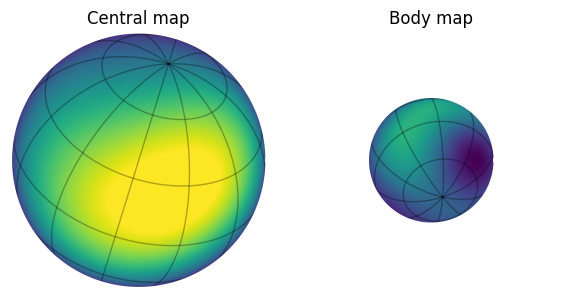

In [27]:
import matplotlib.pyplot as plt


def lim():
    radius = central.radius.magnitude
    plt.xlim(-radius, radius)
    plt.ylim(-radius, radius)


plt.figure(figsize=(6, 3))
plt.subplot(121)
show_map(central, vmax=0.4)
plt.title("Central map")
lim()
plt.subplot(122)
show_map(system.bodies[0], vmax=0.4)
lim()
plt.title("Body map")
_ = plt.tight_layout()

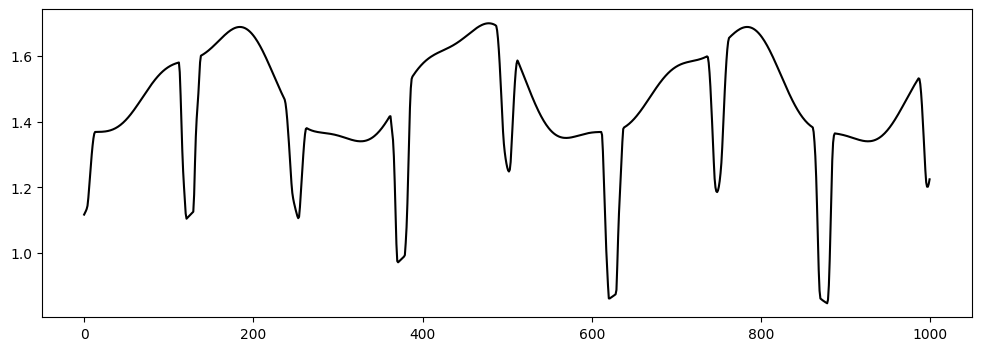

In [28]:
from jaxoplanet.orbits import keplerian
from jaxoplanet.experimental.starry.light_curves import light_curve

time = np.linspace(-2.0, 2.0, 1000)
jaxoplanet_flux = light_curve(system, time)

plt.figure(figsize=(12, 4))
_ = plt.plot(jaxoplanet_flux.sum(0), c="k")